In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from folium.plugins import MiniMap

# 제주 
jeju_tour = pd.read_csv("제주관광공사_제주관광정보시스템(VISIT JEJU)_콘텐츠_20230315.csv", encoding='CP949')
tour=jeju_tour[jeju_tour['콘텐츠분류']=='관광지']
tour_name=tour[['콘텐츠분류', '제목', '위도', '경도']]
tour_name.reset_index(drop = True, inplace=True)
tour_list=tour_name.dropna()

# bus 정류장 데이터 
bus=pd.read_csv("제주특별자치도_버스정류소현황_20221101.csv",encoding='CP949')
bus=bus.drop(['위치정보(주변설명)','데이터 기준일자'],axis=1)
bus_list=bus.dropna()

tour_list.drop_duplicates(inplace=True)
tour_list.reset_index(drop=True, inplace=True)
# bus_list.drop_duplicates(subset="정류소명",inplace=True)
# bus_list.reset_index(drop=True,inplace=True)

new_major=["성산일출봉", "섭지코지", "천지연폭포", "송악산", "마라도", "정방폭포",
           "산방산", "외돌개", "천제연폭포", "주상절리대", "안덕계곡", "성읍민속마을",
          "남원큰엉해변", "감귤박물관", "이중섭미술관", "서귀포치유의숲", "붉은오름 자연휴양림",
          "혼인지", "돈내코", "서귀포자연휴양림", "섶숨", "문섬", "서귀포천문과학문화관",
          "제주추사관", "서복전시관", "서귀포시립기당미술관", "소암현중화기념관", "예래생태체험관"]
def major(sights):
    major_sight=pd.DataFrame(columns=['콘텐츠분류','제목','위도','경도'])
    for i in range(len(sights)):
        a=tour_list[tour_list['제목'].str.contains(sights[i])]
        if a is not None:
            major_sight=pd.concat([major_sight, a])

    return major_sight
major_list=major(new_major)

duplicate_site=[89, 687, 429, 169, 174,376,444,466,1281,1004,1261,801,1136]
major_list.drop(index=duplicate_site, axis=0, inplace=True)



major_index=major_list.index
minor_list=tour_list.drop(major_index)
minor_list.reset_index(drop=True, inplace=True)
major_list.reset_index(drop=True, inplace=True)


C:\Users\gksxk\AppData\Local\Temp\ipykernel_13452\3474255406.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tour_list.drop_duplicates(inplace=True)


In [46]:
major_list

,콘텐츠분류,제목,위도,경도
0,관광지,성산일출봉(UNESCO 세계자연유산),33.462147,126.936424
1,관광지,섭지코지,33.430578,126.927769
2,관광지,천지연폭포,33.244717,126.55982
3,관광지,송악산 [출입제한 - 자연휴식년제 적용 중],33.207714,126.29099
4,관광지,마라도잠수함,33.22783,126.305435
5,관광지,마라도등대,33.116715,126.269512
6,관광지,마라도(마라해양도립공원),33.117093,126.267473
7,관광지,마라도성당,33.115727,126.269174
8,관광지,마라도기원정사,33.115997,126.26655
9,관광지,대한민국최남단기념비/ 마라도 기념비,33.114143,126.268616


In [47]:
# 제목 있는거 찾는거 
tour_list[tour_list['제목'].str.contains('해녀')]
bus_list[bus_list['정류소명'].str.contains('섯동네')]

,정류소아이디,정류소명,위도,경도
1780,406001716,섯동네,33.384849,126.796479
1781,406001717,섯동네,33.384766,126.796599
1782,406001988,섯동네,33.244668,126.386378
1783,406001987,섯동네,33.244630,126.386445
3771,406000799,한남섯동네,33.311456,126.691651
3772,406000800,한남섯동네,33.310956,126.690470


In [48]:
# kk: 주요 관광지 별 3.5km 일반 관광지  

from haversine import haversine
A=[]
for i in range(len(major_list)):
    B=[]
    a=(major_list['위도'][i],major_list['경도'][i])
    
    for j in range(len(minor_list)):
        b=(minor_list['위도'][j],minor_list['경도'][j])
        c=haversine(a,b,unit='km')
        if c < 3.5:            
            B.append(j)
    A.append((major_list['제목'][i],B))
kk=pd.DataFrame(A)

# kk : 삭제한 주요 관광지 근처 관광지 삭제 
# major_list 주요관광지 중 이상한 위치 또는 맛없는 구역 삭제 

unsuitable_site=[5,6,7,8,9,10,11,14,23, 27, 28]
kk.drop(index=unsuitable_site,axis=0, inplace=True)
kk.reset_index(drop=True, inplace=True)
major_list.drop(index=unsuitable_site,axis=0, inplace=True)
major_list.reset_index(drop=True, inplace=True)

# bus_kk : 주요관광지 별 3.5km 버스정류장 데이터프레임 

bus_A=[]
for i in range(len(major_list)):
    bus_B=[]
    a=(major_list['위도'][i],major_list['경도'][i])
    
    for j in range(len(bus_list)):
        b=(bus_list['위도'][j],bus_list['경도'][j])
        c=haversine(a,b,unit='km')
        if c < 3.5:            
            bus_B.append(j)
    bus_A.append((major_list['제목'][i],bus_B))
bus_kk=pd.DataFrame(bus_A)

In [49]:
kk

,0,1
0,성산일출봉(UNESCO 세계자연유산),"[29, 181, 272, 356, 377, 387, 400, 456, 522, 6..."
1,섭지코지,"[6, 10, 29, 30, 121, 208, 356, 387, 441, 456, ..."
2,천지연폭포,"[34, 36, 81, 141, 160, 165, 167, 188, 227, 256..."
3,송악산 [출입제한 - 자연휴식년제 적용 중],"[62, 85, 96, 101, 216, 417, 447, 453, 520, 552..."
4,마라도잠수함,"[62, 85, 105, 170, 186, 195, 216, 364, 391, 43..."
5,정방폭포,"[34, 36, 81, 94, 141, 160, 165, 167, 188, 227,..."
6,산방산,"[62, 170, 179, 186, 195, 217, 259, 303, 364, 3..."
7,외돌개,"[36, 38, 81, 141, 160, 165, 167, 227, 254, 256..."
8,천제연폭포,"[9, 14, 33, 83, 91, 112, 135, 171, 174, 180, 1..."
9,주상절리대(중문대포해안),"[9, 33, 83, 91, 112, 135, 171, 174, 180, 187, ..."


In [50]:
major_list

,콘텐츠분류,제목,위도,경도
0,관광지,성산일출봉(UNESCO 세계자연유산),33.462147,126.936424
1,관광지,섭지코지,33.430578,126.927769
2,관광지,천지연폭포,33.244717,126.55982
3,관광지,송악산 [출입제한 - 자연휴식년제 적용 중],33.207714,126.29099
4,관광지,마라도잠수함,33.22783,126.305435
5,관광지,정방폭포,33.244854,126.5718
6,관광지,산방산,33.236614,126.31289
7,관광지,외돌개,33.240063,126.54573
8,관광지,천제연폭포,33.25099,126.41689
9,관광지,주상절리대(중문대포해안),33.23834,126.42586


In [51]:
# A1: 주변 관광지 리스트로 저장 
# bus_A1: 버스정류장 리스트로 저장  

A1=[]
bus_A1=[]
for i in range(len(kk)):
    for j in range(len(kk[1][i])):
        A1.append(kk[1][i][j])
for i in range(len(bus_kk)):
    for j in range(len(bus_kk[1][i])):
        bus_A1.append(bus_kk[1][i][j])

# in_major: 모든 3.5km 내에 있는 관광지 데이터 프레임 
# bus_in_major 모든 3.5km 내에 있는 버스정류소 데이터 프레임 

in_major=minor_list.loc[A1,:]
bus_in_major=bus_list.loc[bus_A1,:]

# in_major 중복값 제거 
# bus_in_major 중복값 제거 

in_major.drop_duplicates(inplace=True)
bus_in_major.drop_duplicates(inplace=True)
in_major.reset_index(drop=True, inplace=True)
bus_in_major.reset_index(drop=True, inplace=True)

In [52]:
# 지도에 주요 관광지 및 3.5km 내 버스정류장 표시  
# major_list, bus_in_major 사용 

import folium

m = folium.Map(
    location=[in_major['위도'][0], in_major['경도'][0]],
    zoom_start=10
)


    
for lat, long, names in zip(major_list['위도'], major_list['경도'], major_list['제목']):
    folium.Circle([lat, long],
                  radius=3500,
                  popup=names,
                  tooltip=names).add_to(m)
    folium.Marker([lat, long],
                  popup=names,
                  icon=folium.Icon('red', icon='star'),
                  tooltip=names).add_to(m)
    
    
for lat, long, names in zip(bus_in_major['위도'], bus_in_major['경도'], bus_in_major['정류소명']):
    folium.Marker([lat, long],
                  popup=names,
                  icon=folium.Icon('purple', icon='flag'),
                  tooltip=names).add_to(m)
m

# 1. 제주 추사관(서귀포시 좌측)

In [53]:
# 주요관광지 중 first_구역 결정 
# region_list : 구역 주변 관광지들 리스트 
# region_bus_list : 구역 주변 버스 정류장들 리스트 

first_list=['제주추사관']
region_list=kk[kk[0].isin(first_list)]
region_bus_list=bus_kk[bus_kk[0].isin(first_list)]

# index 초기화 
region_list.reset_index(drop=True, inplace=True)
region_bus_list.reset_index(drop=True, inplace=True)

In [54]:
# region_range_list: 구역 모든 주변 관광지 리스트
# region_bus_range_list: 구역 모든 버스 정류장들 리스트 

region_range_list=[]
region_bus_range_list=[]
for i in range(len(region_list)):
    for j in range(len(region_list[1][i])):
        region_range_list.append(region_list[1][i][j])
for i in range(len(region_bus_list)):
    for j in range(len(region_bus_list[1][i])):
        region_bus_range_list.append(region_bus_list[1][i][j])

# first: 구역 모든 주변 관광지 데이트 프레임 {minor_list를 쓴 이유는 bus_kk에서 minor_list로 3.5km를 뽑았기 때문 }
# first: 구역 모든 주변 버스정류장 데이트 프레임 
# first_major: 구역 내 모든 주요관광지 

first=minor_list.loc[region_range_list,:]
bus_first=bus_list.loc[region_bus_range_list,:]        
first_major=major_list[major_list['제목'].isin(first_list)]

# 각 데이별 타입 구분 

first_major["타입"]="주관광지"
first["타입"]="주변관광지"
bus_first["타입"]="주변정류장"

# bus와 first의 columns 이름이 맞지 않아 맞춰주기 위함 
bus_first.rename(columns={'정류소아이디':'콘텐츠분류','정류소명':'제목'},inplace=True)


C:\Users\gksxk\AppData\Local\Temp\ipykernel_13452\1732231144.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_major["타입"]="주관광지"


C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


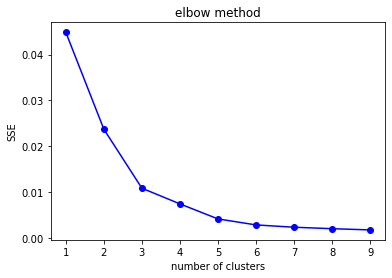

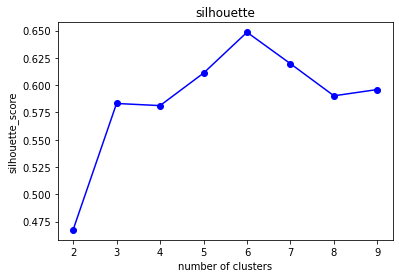

In [55]:
# 구역 내 버스정류장 들 elbow_method, silhouette 계수 실행  

bus_first_df=bus_first[['위도','경도']]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(bus_first_df, 10)


bus_first_df=bus_first[['위도','경도']]
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(bus_first_df)
    labels = kmeans.labels_
    ss.append(silhouette_score(bus_first_df, labels, metric = 'euclidean'))
plt.plot(range(2, 10), ss, 'bo-')
plt.title("silhouette")
plt.xlabel("number of clusters")
plt.ylabel("silhouette_score")
plt.show()

In [56]:
# 구역 내 버스 정류장 데이터 k-means 실행 {K : 지정 필요}

bus_first_df=bus_first[['위도','경도']]
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
# model.fit(first_df)
model.fit(bus_first_df)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# first_df['cluster'] = model.fit_predict(first_df)
bus_first_df['cluster'] = model.fit_predict(bus_first_df)


# 구역 내 군집의 평균 점 저장 
mean=[]
for i in range(k):
        mean.append(np.mean(bus_first_df.loc[bus_first_df['cluster']==i]))
        
# 구역 내 군집화 한 버스정류장데이터 + 데이터 타입 
bus_first_df=pd.concat([bus_first_df,bus_first[['타입','제목','콘텐츠분류']]],axis=1)


C:\Users\gksxk\AppData\Local\Temp\ipykernel_13452\1496326301.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_first_df['cluster'] = model.fit_predict(bus_first_df)
C:\Users\gksxk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


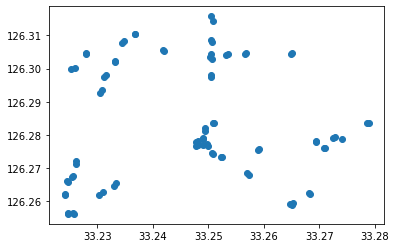

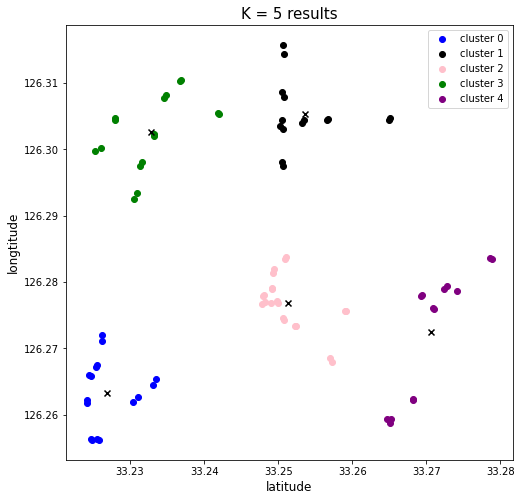

In [57]:
# 색깔 지정 
color=['blue','black','pink','green','purple','orange','white']

# 구역 내 군집화 시각화 
plt.scatter(bus_first_df['위도'],bus_first_df['경도'])


plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bus_first_df.loc[bus_first_df['cluster'] == i, '위도'], bus_first_df.loc[bus_first_df['cluster'] == i, '경도'], 
                label = 'cluster ' + str(i),color=color[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('latitude', size = 12)
plt.ylabel('longtitude', size = 12)


for i in range(k):
    plt.scatter(mean[i]['위도'],mean[i]['경도'],color='black',marker='x')
plt.show()



In [58]:
first_major

,콘텐츠분류,제목,위도,경도,타입
19,관광지,제주추사관,33.25022,126.27838,주관광지


In [59]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][19], first_major['경도'][19]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

for i in range(k):
    for lat, long, ltype in zip(bus_first_df.loc[bus_first_df['cluster']==i]['위도'], bus_first_df.loc[bus_first_df['cluster']==i]['경도'], bus_first_df.loc[bus_first_df['cluster']==i]['제목']):
        
        folium.Marker([lat, long],
        popup=ltype,
        icon=folium.Icon(color[i],icon='flag'),
        tooltip=ltype).add_to(m)                       

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 


m

In [60]:
# 구역 내 군집화로 나눈 버스정류소 데이터들과 그 중앙점으로 데이터 프레임을 새롭게 생성 

# 군집에 따른 중심점을 각각 데이터에 표시 

bus_clustring=bus_first_df.reset_index(drop=True)
cluster_mean=pd.DataFrame(mean)
cluster_mean['cluster']=cluster_mean['cluster'].astype('int')

# aa: 중심점들 
aa=[]
for row in bus_first_df['cluster']:
    if row==0:
        aa.append(cluster_mean.loc[0])
    elif row==1:
        aa.append(cluster_mean.loc[1])
    elif row==2:
        aa.append(cluster_mean.loc[2])
    elif row==3:
        aa.append(cluster_mean.loc[3])
    else:
        aa.append(cluster_mean.loc[4])
        
aa=pd.DataFrame(aa)
aa.reset_index(drop=True,inplace=True)
aa.rename(columns={"위도":"주 위도","경도":"주경도"},inplace=True)
aa.drop("cluster",axis=1,inplace=True)
bus_clustring=pd.concat([aa,bus_clustring],axis=1)

# 각 군집별로 배열 
bus_clustring.sort_values('cluster',inplace=True)

# 각 군집을 색깔로 표시하는 '그룹' 열 생성 

bus_clustring['그룹']=bus_clustring['cluster'].map({0:color[0],1:color[1],2:color[2],3:color[3],4:color[4]})

#  bus_clustring: 그룹, 주 위도, 주경도, 위도, 경도로 이루어진 데이터프레임 생성 

bus_clustring=bus_clustring[["그룹","주 위도","주경도","위도","경도","제목","콘텐츠분류"]]
bus_clustring.reset_index(inplace=True,drop=True)
bus_clustring["군집내거리"]=np.NaN
bus_clustring["주관광지거리"]=np.NaN

# 군집 내 거리와, 주관광지까지의 거리 계산  {주 고나광지 거리 위치는 자신이 설정}

for i in range(len(bus_clustring)):
    bus_clustring["군집내거리"][i]=round(haversine((bus_clustring["주 위도"][i],bus_clustring["주경도"][i]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    bus_clustring["주관광지거리"][i]=round(haversine((first_major["위도"][19],first_major["경도"][19]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    

C:\Users\gksxk\AppData\Local\Temp\ipykernel_13452\1656739310.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring["군집내거리"][i]=round(haversine((bus_clustring["주 위도"][i],bus_clustring["주경도"][i]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
C:\Users\gksxk\AppData\Local\Temp\ipykernel_13452\1656739310.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring["주관광지거리"][i]=round(haversine((first_major["위도"][19],first_major["경도"][19]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)


In [61]:
# 군집내 평균점 까지의 거리 

a1=round(bus_clustring.groupby("그룹")["군집내거리"].describe(),2)
a1.drop(["count","25%","50%","75%"],axis=1,inplace=True)
a1.rename(columns={"mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)


# 주 관광지까지 거리 
a2=round(bus_clustring.groupby("그룹")["주관광지거리"].describe(),2)
a2.drop(["25%","50%","75%"],axis=1,inplace=True)
a2.rename(columns={"count":"정류장 수","mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)

# 주 관광지까지 거리, 군집 내 평균점까지 거리 
final=pd.concat([a2,a1],axis=1)
final=final.reindex(['blue','black','pink','green','purple'])
final

bus_clustring_meter=bus_clustring.loc[bus_clustring['군집내거리']<=0.6]
bus_clustring_meter.groupby('그룹').size()

그룹
black      9
blue       8
green      8
pink      15
purple     4
dtype: int64

In [62]:
final

,정류장 수,평균,표준편차,최소,최대,평균,표준편차,최소,최대
그룹,,,,,,,,,
blue,16.0,2.98,0.41,2.22,3.50,0.55,0.18,0.32,0.81
black,15.0,2.59,0.48,1.78,3.48,0.60,0.38,0.09,1.27
pink,21.0,0.46,0.35,0.12,1.25,0.47,0.27,0.16,1.06
green,16.0,3.04,0.35,2.55,3.49,0.66,0.30,0.06,1.05
purple,14.0,2.51,0.33,2.13,3.23,0.90,0.41,0.33,1.41


In [63]:
bus_clustring_meter['주관광지']="제주추사관"
all_clustring=bus_clustring_meter
bus_clustring_meter

C:\Users\gksxk\AppData\Local\Temp\ipykernel_13452\3279272717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring_meter['주관광지']="제주추사관"


,그룹,주 위도,주경도,위도,경도,제목,콘텐츠분류,군집내거리,주관광지거리,주관광지
0,blue,33.226857,126.263329,33.224500,126.265993,상모,406000925,0.36,3.08,제주추사관
1,blue,33.226857,126.263329,33.224700,126.265795,상모,406000926,0.33,3.07,제주추사관
10,blue,33.226857,126.263329,33.225583,126.267467,상모리 이교동,406000924,0.41,2.92,제주추사관
11,blue,33.226857,126.263329,33.225400,126.267167,상모리 이교동,406000923,0.39,2.95,제주추사관
12,blue,33.226857,126.263329,33.224131,126.261796,상모리 대동,406000921,0.33,3.29,제주추사관
13,blue,33.226857,126.263329,33.224154,126.262255,상모리 대동,406000922,0.32,3.26,제주추사관
14,blue,33.226857,126.263329,33.231009,126.262713,해병부대,406000788,0.47,2.59,제주추사관
15,blue,33.226857,126.263329,33.230366,126.261869,대정고등학교,406000948,0.41,2.69,제주추사관
16,black,33.253680,126.305301,33.253233,126.304017,불미공방,406000787,0.13,2.41,제주추사관
17,black,33.253680,126.305301,33.250725,126.307945,덕수리동동,406000945,0.41,2.75,제주추사관


In [64]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][19], first_major['경도'][19]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

        
for i in range(k):
    for lat, long, ltype in zip(bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['위도'], bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['경도'], bus_clustring_meter.loc[bus_clustring_meter['그룹']==color[i]]['제목']):

        folium.Marker([lat, long],
        popup=ltype,
        icon=folium.Icon(color=color[i], icon='flag'),
        tooltip=ltype).add_to(m)

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 

minimap = MiniMap()
m.add_child(minimap)

m

In [66]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][19], first_major['경도'][19]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

        
for i in range(k):
    for lat, long, ltype in zip(bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['위도'], bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['경도'], bus_clustring_meter.loc[bus_clustring_meter['그룹']==color[i]]['제목']):

        folium.Circle([lat, long],
        popup=ltype,
        radius=100,
        color=color[i],
        fill = color[i],
        tooltip=ltype).add_to(m)

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)
    folium.Circle([mean[j]['위도'], mean[j]['경도']],
              radius = 600).add_to(m) 


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 

minimap = MiniMap()
m.add_child(minimap)

m

# 2. 천제연 군집(서귀포시 중앙-서쪽 지역) 

In [21]:
# 주요관광지 중 first_구역 결정 
# region_list : 구역 주변 관광지들 리스트 
# region_bus_list : 구역 주변 버스 정류장들 리스트 

first_list=['천제연폭포']
region_list=kk[kk[0].isin(first_list)]
region_bus_list=bus_kk[bus_kk[0].isin(first_list)]

# index 초기화 
region_list.reset_index(drop=True, inplace=True)
region_bus_list.reset_index(drop=True, inplace=True)

# region_range_list: 구역 모든 주변 관광지 리스트
# region_bus_range_list: 구역 모든 버스 정류장들 리스트 

region_range_list=[]
region_bus_range_list=[]
for i in range(len(region_list)):
    for j in range(len(region_list[1][i])):
        region_range_list.append(region_list[1][i][j])
for i in range(len(region_bus_list)):
    for j in range(len(region_bus_list[1][i])):
        region_bus_range_list.append(region_bus_list[1][i][j])

# first: 구역 모든 주변 관광지 데이트 프레임 {minor_list를 쓴 이유는 bus_kk에서 minor_list로 3.5km를 뽑았기 때문 }
# first: 구역 모든 주변 버스정류장 데이트 프레임 
# first_major: 구역 내 모든 주요관광지 

first=minor_list.loc[region_range_list,:]
bus_first=bus_list.loc[region_bus_range_list,:]        
first_major=major_list[major_list['제목'].isin(first_list)]

# 각 데이별 타입 구분 

first_major["타입"]="주관광지"
first["타입"]="주변관광지"
bus_first["타입"]="주변정류장"

# bus와 first의 columns 이름이 맞지 않아 맞춰주기 위함 
bus_first.rename(columns={'정류소아이디':'콘텐츠분류','정류소명':'제목'},inplace=True)


# 구역 내 버스 정류장 데이터 k-means 실행 {K : 지정 필요}

bus_first_df=bus_first[['위도','경도']]
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
# model.fit(first_df)
model.fit(bus_first_df)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# first_df['cluster'] = model.fit_predict(first_df)
bus_first_df['cluster'] = model.fit_predict(bus_first_df)


# 구역 내 군집의 평균 점 저장 
mean=[]
for i in range(k):
        mean.append(np.mean(bus_first_df.loc[bus_first_df['cluster']==i]))

# 구역 내 군집화 한 버스정류장데이터 + 데이터 타입 
bus_first_df=pd.concat([bus_first_df,bus_first[['타입','제목',"콘텐츠분류"]]],axis=1)

# 구역 내 군집화로 나눈 버스정류소 데이터들과 그 중앙점으로 데이터 프레임을 새롭게 생성 

# 군집에 따른 중심점을 각각 데이터에 표시 

bus_clustring=bus_first_df.reset_index(drop=True)
cluster_mean=pd.DataFrame(mean)
cluster_mean['cluster']=cluster_mean['cluster'].astype('int')

# aa: 중심점들 
aa=[]
for row in bus_first_df['cluster']:
    if row==0:
        aa.append(cluster_mean.loc[0])
    elif row==1:
        aa.append(cluster_mean.loc[1])
    elif row==2:
        aa.append(cluster_mean.loc[2])
    elif row==3:
        aa.append(cluster_mean.loc[3])
    else:
        aa.append(cluster_mean.loc[4])
        
aa=pd.DataFrame(aa)
aa.reset_index(drop=True,inplace=True)
aa.rename(columns={"위도":"주 위도","경도":"주경도"},inplace=True)
aa.drop("cluster",axis=1,inplace=True)
bus_clustring=pd.concat([aa,bus_clustring],axis=1)

# 각 군집별로 배열 
bus_clustring.sort_values('cluster',inplace=True)

# 각 군집을 색깔로 표시하는 '그룹' 열 생성 

bus_clustring['그룹']=bus_clustring['cluster'].map({0:color[0],1:color[1],2:color[2],3:color[3],4:color[4]})

#  bus_clustring: 그룹, 주 위도, 주경도, 위도, 경도로 이루어진 데이터프레임 생성 

bus_clustring=bus_clustring[["그룹","주 위도","주경도","위도","경도","제목","콘텐츠분류"]]
bus_clustring.reset_index(inplace=True,drop=True)
bus_clustring["군집내거리"]=np.NaN
bus_clustring["주관광지거리"]=np.NaN

# 군집 내 거리와, 주관광지까지의 거리 계산  {주 고나광지 거리 위치는 자신이 설정}
first_major.reset_index(inplace=True,drop=True)

for i in range(len(bus_clustring)):
    bus_clustring["군집내거리"][i]=round(haversine((bus_clustring["주 위도"][i],bus_clustring["주경도"][i]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    bus_clustring["주관광지거리"][i]=round(haversine((first_major["위도"][0],first_major["경도"][0]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    
# 군집내 평균점 까지의 거리 

a1=round(bus_clustring.groupby("그룹")["군집내거리"].describe(),2)
a1.drop(["count","25%","50%","75%"],axis=1,inplace=True)
a1.rename(columns={"mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)


# 주 관광지까지 거리 
a2=round(bus_clustring.groupby("그룹")["주관광지거리"].describe(),2)
a2.drop(["25%","50%","75%"],axis=1,inplace=True)
a2.rename(columns={"count":"정류장 수","mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)

# 주 관광지까지 거리, 군집 내 평균점까지 거리 
final=pd.concat([a2,a1],axis=1)
final=final.reindex(['blue','black','pink','green','purple'])
final

bus_clustring_meter=bus_clustring.loc[bus_clustring['군집내거리']<=0.5]
print(bus_clustring_meter.groupby('그룹').size())
bus_clustring_meter['주관광지']="천제연폭포"
all_clustring=pd.concat([all_clustring,bus_clustring_meter],axis=0)

C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1912989150.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_major["타입"]="주관광지"
C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1912989150.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_first_df['cluster'] = model.fit_predict(bus_first_df)
C:\Users\gksxk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain t

그룹
black     12
blue      13
green      7
pink      11
purple     4
dtype: int64


C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1912989150.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring_meter['주관광지']="천제연폭포"


In [22]:
final

,정류장 수,평균,표준편차,최소,최대,평균,표준편차,최소,최대
그룹,,,,,,,,,
blue,33.0,0.83,0.40,0.27,1.45,0.66,0.32,0.17,1.35
black,16.0,2.92,0.21,2.61,3.34,0.37,0.31,0.11,1.09
pink,28.0,2.55,0.46,1.74,3.38,0.71,0.46,0.26,1.74
green,16.0,1.77,0.20,1.55,2.09,0.51,0.27,0.11,0.91
purple,19.0,2.23,0.71,1.12,3.28,0.73,0.33,0.23,1.22


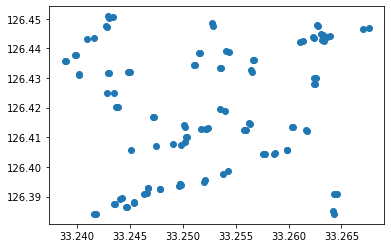

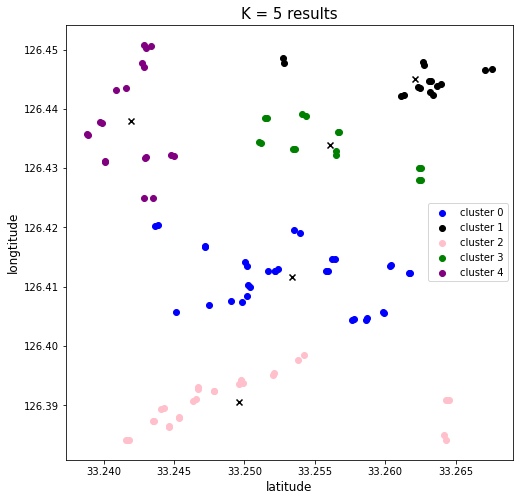

In [23]:
# 색깔 지정 
color=['blue','black','pink','green','purple','orange','white']

# 구역 내 군집화 시각화 
plt.scatter(bus_first_df['위도'],bus_first_df['경도'])


plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bus_first_df.loc[bus_first_df['cluster'] == i, '위도'], bus_first_df.loc[bus_first_df['cluster'] == i, '경도'], 
                label = 'cluster ' + str(i),color=color[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('latitude', size = 12)
plt.ylabel('longtitude', size = 12)


for i in range(k):
    plt.scatter(mean[i]['위도'],mean[i]['경도'],color='black',marker='x')
plt.show()



In [24]:
first_major

,콘텐츠분류,제목,위도,경도,타입
0,관광지,천제연폭포,33.25099,126.41689,주관광지


In [25]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][0], first_major['경도'][0]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

        
for i in range(k):
    for lat, long, ltype in zip(bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['위도'], bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['경도'], bus_clustring_meter.loc[bus_clustring_meter['그룹']==color[i]]['제목']):

        folium.Marker([lat, long],
        popup=ltype,
        icon=folium.Icon(color=color[i], icon='flag'),
        tooltip=ltype).add_to(m)

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 

minimap = MiniMap()
m.add_child(minimap)

m

# 3. 천지연 폭포

In [26]:
# 주요관광지 중 first_구역 결정 
# region_list : 구역 주변 관광지들 리스트 
# region_bus_list : 구역 주변 버스 정류장들 리스트 

first_list=['천지연폭포']
region_list=kk[kk[0].isin(first_list)]
region_bus_list=bus_kk[bus_kk[0].isin(first_list)]

# index 초기화 
region_list.reset_index(drop=True, inplace=True)
region_bus_list.reset_index(drop=True, inplace=True)

# region_range_list: 구역 모든 주변 관광지 리스트
# region_bus_range_list: 구역 모든 버스 정류장들 리스트 

region_range_list=[]
region_bus_range_list=[]
for i in range(len(region_list)):
    for j in range(len(region_list[1][i])):
        region_range_list.append(region_list[1][i][j])
for i in range(len(region_bus_list)):
    for j in range(len(region_bus_list[1][i])):
        region_bus_range_list.append(region_bus_list[1][i][j])

# first: 구역 모든 주변 관광지 데이트 프레임 {minor_list를 쓴 이유는 bus_kk에서 minor_list로 3.5km를 뽑았기 때문 }
# first: 구역 모든 주변 버스정류장 데이트 프레임 
# first_major: 구역 내 모든 주요관광지 

first=minor_list.loc[region_range_list,:]
bus_first=bus_list.loc[region_bus_range_list,:]        
first_major=major_list[major_list['제목'].isin(first_list)]

# 각 데이별 타입 구분 

first_major["타입"]="주관광지"
first["타입"]="주변관광지"
bus_first["타입"]="주변정류장"

# bus와 first의 columns 이름이 맞지 않아 맞춰주기 위함 
bus_first.rename(columns={'정류소아이디':'콘텐츠분류','정류소명':'제목'},inplace=True)


# 구역 내 버스 정류장 데이터 k-means 실행 {K : 지정 필요}

bus_first_df=bus_first[['위도','경도']]
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
# model.fit(first_df)
model.fit(bus_first_df)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# first_df['cluster'] = model.fit_predict(first_df)
bus_first_df['cluster'] = model.fit_predict(bus_first_df)



# 구역 내 군집의 평균 점 저장 
mean=[]
for i in range(k):
        mean.append(np.mean(bus_first_df.loc[bus_first_df['cluster']==i]))
        
# 구역 내 군집화 한 버스정류장데이터 + 데이터 타입 
bus_first_df=pd.concat([bus_first_df,bus_first[['타입','제목','콘텐츠분류']]],axis=1)

# 구역 내 군집화로 나눈 버스정류소 데이터들과 그 중앙점으로 데이터 프레임을 새롭게 생성 

# 군집에 따른 중심점을 각각 데이터에 표시 

bus_clustring=bus_first_df.reset_index(drop=True)
cluster_mean=pd.DataFrame(mean)
cluster_mean['cluster']=cluster_mean['cluster'].astype('int')

# aa: 중심점들 
aa=[]
for row in bus_first_df['cluster']:
    if row==0:
        aa.append(cluster_mean.loc[0])
    elif row==1:
        aa.append(cluster_mean.loc[1])
    elif row==2:
        aa.append(cluster_mean.loc[2])
    elif row==3:
        aa.append(cluster_mean.loc[3])
    else:
        aa.append(cluster_mean.loc[4])
        
aa=pd.DataFrame(aa)
aa.reset_index(drop=True,inplace=True)
aa.rename(columns={"위도":"주 위도","경도":"주경도"},inplace=True)
aa.drop("cluster",axis=1,inplace=True)
bus_clustring=pd.concat([aa,bus_clustring],axis=1)

# 각 군집별로 배열 
bus_clustring.sort_values('cluster',inplace=True)

# 각 군집을 색깔로 표시하는 '그룹' 열 생성 

bus_clustring['그룹']=bus_clustring['cluster'].map({0:color[0],1:color[1],2:color[2],3:color[3],4:color[4]})

#  bus_clustring: 그룹, 주 위도, 주경도, 위도, 경도로 이루어진 데이터프레임 생성 

bus_clustring=bus_clustring[["그룹","주 위도","주경도","위도","경도","제목","콘텐츠분류"]]
bus_clustring.reset_index(inplace=True,drop=True)
bus_clustring["군집내거리"]=np.NaN
bus_clustring["주관광지거리"]=np.NaN

# 군집 내 거리와, 주관광지까지의 거리 계산  {주 고나광지 거리 위치는 자신이 설정}
first_major.reset_index(inplace=True,drop=True)

for i in range(len(bus_clustring)):
    bus_clustring["군집내거리"][i]=round(haversine((bus_clustring["주 위도"][i],bus_clustring["주경도"][i]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    bus_clustring["주관광지거리"][i]=round(haversine((first_major["위도"][0],first_major["경도"][0]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    
# 군집내 평균점 까지의 거리 

a1=round(bus_clustring.groupby("그룹")["군집내거리"].describe(),2)
a1.drop(["count","25%","50%","75%"],axis=1,inplace=True)
a1.rename(columns={"mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)


# 주 관광지까지 거리 
a2=round(bus_clustring.groupby("그룹")["주관광지거리"].describe(),2)
a2.drop(["25%","50%","75%"],axis=1,inplace=True)
a2.rename(columns={"count":"정류장 수","mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)

# 주 관광지까지 거리, 군집 내 평균점까지 거리 
final=pd.concat([a2,a1],axis=1)
final=final.reindex(['blue','black','pink','green','purple'])
final

bus_clustring_meter=bus_clustring.loc[bus_clustring['군집내거리']<=0.5]
print(bus_clustring_meter.groupby('그룹').size())
bus_clustring_meter['주관광지']="천지연폭포"
all_clustring=pd.concat([all_clustring,bus_clustring_meter],axis=0)

C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\501887268.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_major["타입"]="주관광지"
C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\501887268.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_first_df['cluster'] = model.fit_predict(bus_first_df)
C:\Users\gksxk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the

그룹
black      4
blue      31
green      9
pink       7
purple    15
dtype: int64


C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\501887268.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring_meter['주관광지']="천지연폭포"


In [27]:
final

,정류장 수,평균,표준편차,최소,최대,평균,표준편차,최소,최대
그룹,,,,,,,,,
blue,67.0,0.77,0.33,0.16,1.45,0.53,0.23,0.06,0.92
black,39.0,2.94,0.48,1.99,3.50,0.77,0.26,0.21,1.27
pink,40.0,2.40,0.64,1.57,3.40,0.85,0.40,0.27,1.74
green,32.0,1.29,0.67,0.43,2.53,0.84,0.40,0.19,1.44
purple,39.0,2.17,0.50,1.43,3.40,0.66,0.29,0.13,1.33


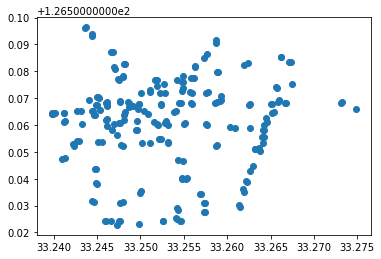

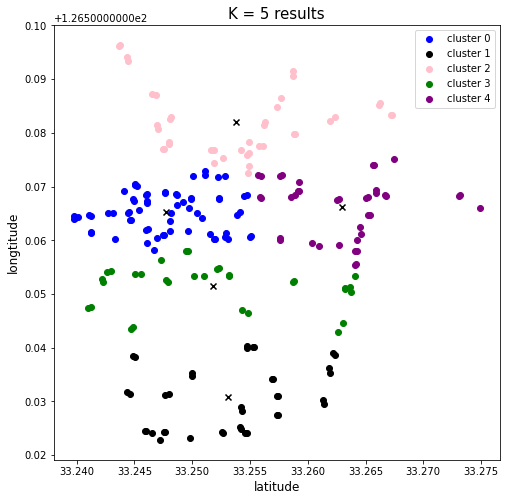

In [28]:
# 색깔 지정 
color=['blue','black','pink','green','purple','orange','white']

# 구역 내 군집화 시각화 
plt.scatter(bus_first_df['위도'],bus_first_df['경도'])


plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bus_first_df.loc[bus_first_df['cluster'] == i, '위도'], bus_first_df.loc[bus_first_df['cluster'] == i, '경도'], 
                label = 'cluster ' + str(i),color=color[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('latitude', size = 12)
plt.ylabel('longtitude', size = 12)


for i in range(k):
    plt.scatter(mean[i]['위도'],mean[i]['경도'],color='black',marker='x')
plt.show()



In [29]:
first_major

,콘텐츠분류,제목,위도,경도,타입
0,관광지,천지연폭포,33.244717,126.55982,주관광지


In [30]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][0], first_major['경도'][0]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

        
for i in range(k):
    for lat, long, ltype in zip(bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['위도'], bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['경도'], bus_clustring_meter.loc[bus_clustring_meter['그룹']==color[i]]['제목']):

        folium.Marker([lat, long],
        popup=ltype,
        icon=folium.Icon(color=color[i], icon='flag'),
        tooltip=ltype).add_to(m)

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 

minimap = MiniMap()
m.add_child(minimap)

m

##  4.남원 큰엉해변(서귀포시 중앙-동쪽지역)

In [31]:
# 주요관광지 중 first_구역 결정 
# region_list : 구역 주변 관광지들 리스트 
# region_bus_list : 구역 주변 버스 정류장들 리스트 

first_list=['남원큰엉해변']
region_list=kk[kk[0].isin(first_list)]
region_bus_list=bus_kk[bus_kk[0].isin(first_list)]

# index 초기화 
region_list.reset_index(drop=True, inplace=True)
region_bus_list.reset_index(drop=True, inplace=True)

# region_range_list: 구역 모든 주변 관광지 리스트
# region_bus_range_list: 구역 모든 버스 정류장들 리스트 

region_range_list=[]
region_bus_range_list=[]
for i in range(len(region_list)):
    for j in range(len(region_list[1][i])):
        region_range_list.append(region_list[1][i][j])
for i in range(len(region_bus_list)):
    for j in range(len(region_bus_list[1][i])):
        region_bus_range_list.append(region_bus_list[1][i][j])

# first: 구역 모든 주변 관광지 데이트 프레임 {minor_list를 쓴 이유는 bus_kk에서 minor_list로 3.5km를 뽑았기 때문 }
# first: 구역 모든 주변 버스정류장 데이트 프레임 
# first_major: 구역 내 모든 주요관광지 

first=minor_list.loc[region_range_list,:]
bus_first=bus_list.loc[region_bus_range_list,:]        
first_major=major_list[major_list['제목'].isin(first_list)]

# 각 데이별 타입 구분 

first_major["타입"]="주관광지"
first["타입"]="주변관광지"
bus_first["타입"]="주변정류장"

# bus와 first의 columns 이름이 맞지 않아 맞춰주기 위함 
bus_first.rename(columns={'정류소아이디':'콘텐츠분류','정류소명':'제목'},inplace=True)


# 구역 내 버스 정류장 데이터 k-means 실행 {K : 지정 필요}

bus_first_df=bus_first[['위도','경도']]
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
# model.fit(first_df)
model.fit(bus_first_df)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# first_df['cluster'] = model.fit_predict(first_df)
bus_first_df['cluster'] = model.fit_predict(bus_first_df)

# 구역 내 군집의 평균 점 저장 
mean=[]
for i in range(k):
        mean.append(np.mean(bus_first_df.loc[bus_first_df['cluster']==i]))

# 구역 내 군집화 한 버스정류장데이터 + 데이터 타입 
bus_first_df=pd.concat([bus_first_df,bus_first[['타입','제목',"콘텐츠분류"]]],axis=1)
        
    
# 구역 내 군집화로 나눈 버스정류소 데이터들과 그 중앙점으로 데이터 프레임을 새롭게 생성 
# 군집에 따른 중심점을 각각 데이터에 표시 

bus_clustring=bus_first_df.reset_index(drop=True)
cluster_mean=pd.DataFrame(mean)
cluster_mean['cluster']=cluster_mean['cluster'].astype('int')

# aa: 중심점들 
aa=[]
for row in bus_first_df['cluster']:
    if row==0:
        aa.append(cluster_mean.loc[0])
    elif row==1:
        aa.append(cluster_mean.loc[1])
    elif row==2:
        aa.append(cluster_mean.loc[2])
    elif row==3:
        aa.append(cluster_mean.loc[3])
    else:
        aa.append(cluster_mean.loc[4])
        
aa=pd.DataFrame(aa)
aa.reset_index(drop=True,inplace=True)
aa.rename(columns={"위도":"주 위도","경도":"주경도"},inplace=True)
aa.drop("cluster",axis=1,inplace=True)
bus_clustring=pd.concat([aa,bus_clustring],axis=1)

# 각 군집별로 배열 
bus_clustring.sort_values('cluster',inplace=True)

# 각 군집을 색깔로 표시하는 '그룹' 열 생성 

bus_clustring['그룹']=bus_clustring['cluster'].map({0:color[0],1:color[1],2:color[2],3:color[3],4:color[4]})

#  bus_clustring: 그룹, 주 위도, 주경도, 위도, 경도로 이루어진 데이터프레임 생성 

bus_clustring=bus_clustring[["그룹","주 위도","주경도","위도","경도","제목","콘텐츠분류"]]
bus_clustring.reset_index(inplace=True,drop=True)
bus_clustring["군집내거리"]=np.NaN
bus_clustring["주관광지거리"]=np.NaN

# 군집 내 거리와, 주관광지까지의 거리 계산  {주 고나광지 거리 위치는 자신이 설정}
first_major.reset_index(inplace=True,drop=True)

for i in range(len(bus_clustring)):
    bus_clustring["군집내거리"][i]=round(haversine((bus_clustring["주 위도"][i],bus_clustring["주경도"][i]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    bus_clustring["주관광지거리"][i]=round(haversine((first_major["위도"][0],first_major["경도"][0]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    
# 군집내 평균점 까지의 거리 

a1=round(bus_clustring.groupby("그룹")["군집내거리"].describe(),2)
a1.drop(["count","25%","50%","75%"],axis=1,inplace=True)
a1.rename(columns={"mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)


# 주 관광지까지 거리 
a2=round(bus_clustring.groupby("그룹")["주관광지거리"].describe(),2)
a2.drop(["25%","50%","75%"],axis=1,inplace=True)
a2.rename(columns={"count":"정류장 수","mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)

# 주 관광지까지 거리, 군집 내 평균점까지 거리 
final=pd.concat([a2,a1],axis=1)
final=final.reindex(['blue','black','pink','green','purple'])
final

bus_clustring_meter=bus_clustring.loc[bus_clustring['군집내거리']<=0.5]
print(bus_clustring_meter.groupby('그룹').size())
bus_clustring_meter['주관광지']="남원큰엉해변"
all_clustring=pd.concat([all_clustring,bus_clustring_meter],axis=0)

C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1694593155.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_major["타입"]="주관광지"
C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1694593155.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_first_df['cluster'] = model.fit_predict(bus_first_df)
C:\Users\gksxk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain t

그룹
black      6
green      8
pink      12
purple     4
dtype: int64


C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1694593155.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring_meter['주관광지']="남원큰엉해변"


In [32]:
final

,정류장 수,평균,표준편차,최소,최대,평균,표준편차,최소,최대
그룹,,,,,,,,,
blue,16.0,2.03,0.59,1.16,3.08,0.73,0.22,0.55,1.12
black,8.0,3.27,0.11,3.08,3.38,0.34,0.18,0.19,0.65
pink,28.0,2.04,0.64,1.08,3.26,0.70,0.43,0.04,1.69
green,16.0,0.70,0.50,0.21,1.60,0.61,0.35,0.13,1.13
purple,14.0,2.93,0.53,2.04,3.50,0.52,0.20,0.24,0.88


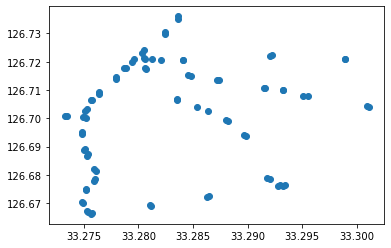

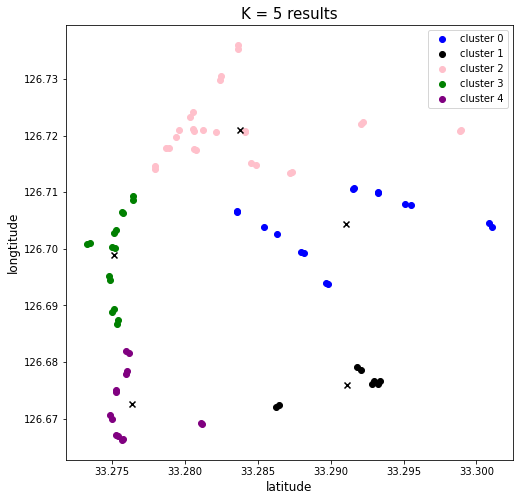

In [33]:
# 색깔 지정 
color=['blue','black','pink','green','purple','orange','white']

# 구역 내 군집화 시각화 
plt.scatter(bus_first_df['위도'],bus_first_df['경도'])


plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bus_first_df.loc[bus_first_df['cluster'] == i, '위도'], bus_first_df.loc[bus_first_df['cluster'] == i, '경도'], 
                label = 'cluster ' + str(i),color=color[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('latitude', size = 12)
plt.ylabel('longtitude', size = 12)


for i in range(k):
    plt.scatter(mean[i]['위도'],mean[i]['경도'],color='black',marker='x')
plt.show()



In [34]:
first_major

,콘텐츠분류,제목,위도,경도,타입
0,관광지,남원큰엉해변,33.27338,126.70375,주관광지


In [35]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][0], first_major['경도'][0]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

        
for i in range(k):
    for lat, long, ltype in zip(bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['위도'], bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['경도'], bus_clustring_meter.loc[bus_clustring_meter['그룹']==color[i]]['제목']):

        folium.Marker([lat, long],
        popup=ltype,
        icon=folium.Icon(color=color[i], icon='flag'),
        tooltip=ltype).add_to(m)

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 

minimap = MiniMap()
m.add_child(minimap)

m

## 5. 혼인지(제주 서귀포시 동쪽지역)

In [36]:
# 주요관광지 중 first_구역 결정 
# region_list : 구역 주변 관광지들 리스트 
# region_bus_list : 구역 주변 버스 정류장들 리스트 

first_list=['혼인지']
region_list=kk[kk[0].isin(first_list)]
region_bus_list=bus_kk[bus_kk[0].isin(first_list)]

# index 초기화 
region_list.reset_index(drop=True, inplace=True)
region_bus_list.reset_index(drop=True, inplace=True)

# region_range_list: 구역 모든 주변 관광지 리스트
# region_bus_range_list: 구역 모든 버스 정류장들 리스트 

region_range_list=[]
region_bus_range_list=[]
for i in range(len(region_list)):
    for j in range(len(region_list[1][i])):
        region_range_list.append(region_list[1][i][j])
for i in range(len(region_bus_list)):
    for j in range(len(region_bus_list[1][i])):
        region_bus_range_list.append(region_bus_list[1][i][j])

# first: 구역 모든 주변 관광지 데이트 프레임 {minor_list를 쓴 이유는 bus_kk에서 minor_list로 3.5km를 뽑았기 때문 }
# first: 구역 모든 주변 버스정류장 데이트 프레임 
# first_major: 구역 내 모든 주요관광지 

first=minor_list.loc[region_range_list,:]
bus_first=bus_list.loc[region_bus_range_list,:]        
first_major=major_list[major_list['제목'].isin(first_list)]

# 각 데이별 타입 구분 

first_major["타입"]="주관광지"
first["타입"]="주변관광지"
bus_first["타입"]="주변정류장"

# bus와 first의 columns 이름이 맞지 않아 맞춰주기 위함 
bus_first.rename(columns={'정류소아이디':'콘텐츠분류','정류소명':'제목'},inplace=True)


# 구역 내 버스 정류장 데이터 k-means 실행 {K : 지정 필요}

bus_first_df=bus_first[['위도','경도']]
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
# model.fit(first_df)
model.fit(bus_first_df)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# first_df['cluster'] = model.fit_predict(first_df)
bus_first_df['cluster'] = model.fit_predict(bus_first_df)

# 구역 내 군집의 평균 점 저장 
mean=[]
for i in range(k):
        mean.append(np.mean(bus_first_df.loc[bus_first_df['cluster']==i]))

# 구역 내 군집화 한 버스정류장데이터 + 데이터 타입 
bus_first_df=pd.concat([bus_first_df,bus_first[['타입','제목','콘텐츠분류']]],axis=1)

# 구역 내 군집화로 나눈 버스정류소 데이터들과 그 중앙점으로 데이터 프레임을 새롭게 생성 

# 군집에 따른 중심점을 각각 데이터에 표시 

bus_clustring=bus_first_df.reset_index(drop=True)
cluster_mean=pd.DataFrame(mean)
cluster_mean['cluster']=cluster_mean['cluster'].astype('int')

# aa: 중심점들 
aa=[]
for row in bus_first_df['cluster']:
    if row==0:
        aa.append(cluster_mean.loc[0])
    elif row==1:
        aa.append(cluster_mean.loc[1])
    elif row==2:
        aa.append(cluster_mean.loc[2])
    elif row==3:
        aa.append(cluster_mean.loc[3])
    else:
        aa.append(cluster_mean.loc[4])
        
aa=pd.DataFrame(aa)
aa.reset_index(drop=True,inplace=True)
aa.rename(columns={"위도":"주 위도","경도":"주경도"},inplace=True)
aa.drop("cluster",axis=1,inplace=True)
bus_clustring=pd.concat([aa,bus_clustring],axis=1)

# 각 군집별로 배열 
bus_clustring.sort_values('cluster',inplace=True)

# 각 군집을 색깔로 표시하는 '그룹' 열 생성 

bus_clustring['그룹']=bus_clustring['cluster'].map({0:color[0],1:color[1],2:color[2],3:color[3],4:color[4]})

#  bus_clustring: 그룹, 주 위도, 주경도, 위도, 경도로 이루어진 데이터프레임 생성 

bus_clustring=bus_clustring[["그룹","주 위도","주경도","위도","경도","제목","콘텐츠분류"]]
bus_clustring.reset_index(inplace=True,drop=True)
bus_clustring["군집내거리"]=np.NaN
bus_clustring["주관광지거리"]=np.NaN

# 군집 내 거리와, 주관광지까지의 거리 계산  {주 고나광지 거리 위치는 자신이 설정}
first_major.reset_index(inplace=True,drop=True)

for i in range(len(bus_clustring)):
    bus_clustring["군집내거리"][i]=round(haversine((bus_clustring["주 위도"][i],bus_clustring["주경도"][i]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    bus_clustring["주관광지거리"][i]=round(haversine((first_major["위도"][0],first_major["경도"][0]),(bus_clustring["위도"][i],bus_clustring["경도"][i])),2)
    
# 군집내 평균점 까지의 거리 

a1=round(bus_clustring.groupby("그룹")["군집내거리"].describe(),2)
a1.drop(["count","25%","50%","75%"],axis=1,inplace=True)
a1.rename(columns={"mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)


# 주 관광지까지 거리 
a2=round(bus_clustring.groupby("그룹")["주관광지거리"].describe(),2)
a2.drop(["25%","50%","75%"],axis=1,inplace=True)
a2.rename(columns={"count":"정류장 수","mean":"평균","std":"표준편차","min":"최소","max":"최대"},inplace=True)

# 주 관광지까지 거리, 군집 내 평균점까지 거리 
final=pd.concat([a2,a1],axis=1)
final=final.reindex(['blue','black','pink','green','purple'])
final

bus_clustring_meter=bus_clustring.loc[bus_clustring['군집내거리']<=0.5]
print(bus_clustring_meter.groupby('그룹').size())
bus_clustring_meter['주관광지']="혼인지"
all_clustring=pd.concat([all_clustring,bus_clustring_meter],axis=0)

C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1457907081.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_major["타입"]="주관광지"
C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1457907081.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_first_df['cluster'] = model.fit_predict(bus_first_df)
C:\Users\gksxk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain t

그룹
black      3
blue       4
green      4
pink      10
purple     3
dtype: int64


C:\Users\gksxk\AppData\Local\Temp\ipykernel_10604\1457907081.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_clustring_meter['주관광지']="혼인지"


In [37]:
final

,정류장 수,평균,표준편차,최소,최대,평균,표준편차,최소,최대
그룹,,,,,,,,,
blue,22.0,2.53,0.61,1.50,3.47,0.83,0.41,0.23,1.42
black,7.0,3.27,0.12,3.18,3.46,0.53,0.34,0.16,0.94
pink,18.0,1.08,0.28,0.62,1.61,0.50,0.30,0.13,1.01
green,8.0,3.30,0.13,3.10,3.44,0.45,0.19,0.26,0.67
purple,12.0,2.49,0.69,1.58,3.46,0.84,0.36,0.45,1.48


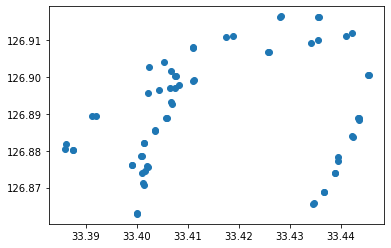

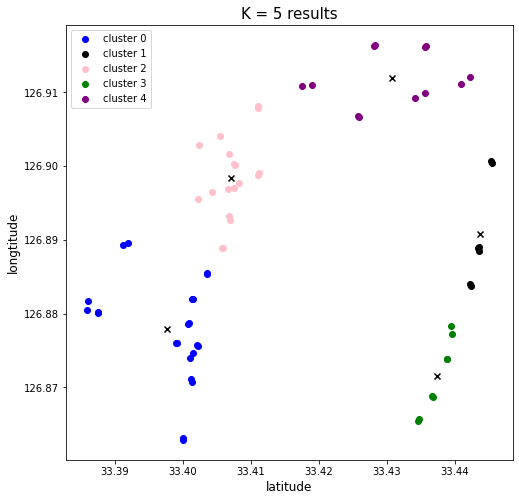

In [38]:
# 색깔 지정 
color=['blue','black','pink','green','purple','orange','white']

# 구역 내 군집화 시각화 
plt.scatter(bus_first_df['위도'],bus_first_df['경도'])


plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bus_first_df.loc[bus_first_df['cluster'] == i, '위도'], bus_first_df.loc[bus_first_df['cluster'] == i, '경도'], 
                label = 'cluster ' + str(i),color=color[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('latitude', size = 12)
plt.ylabel('longtitude', size = 12)


for i in range(k):
    plt.scatter(mean[i]['위도'],mean[i]['경도'],color='black',marker='x')
plt.show()


In [39]:
first_major

,콘텐츠분류,제목,위도,경도,타입
0,관광지,혼인지,33.414932,126.894104,주관광지


In [40]:
color=['blue','black','pink','green','purple','orange','white']

m = folium.Map(
    location=[first_major['위도'][0], first_major['경도'][0]],
    zoom_start=13
)

# bus_first_df 구역 내 버스 군집화 결과 

        
for i in range(k):
    for lat, long, ltype in zip(bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['위도'], bus_clustring_meter.loc[bus_clustring_meter["그룹"]==color[i]]['경도'], bus_clustring_meter.loc[bus_clustring_meter['그룹']==color[i]]['제목']):

        folium.Marker([lat, long],
        popup=ltype,
        icon=folium.Icon(color=color[i], icon='flag'),
        tooltip=ltype).add_to(m)

# mean 구역 내 버스 군집화 중심점 
     
for j in range(k):
    folium.Marker([mean[j]['위도'], mean[j]['경도']],
              icon=folium.Icon('red', icon='bookmark')).add_to(m)


# first 구역 내 주변 관광지 
 
# for lat, long, ltype in zip(first['위도'], first['경도'], first['제목']):
#         folium.Circle([lat, long],
#         popup=ltype,
#         radius=100,
#         color='red',
#         icon=folium.Icon('red',icon='home'),
#         tooltip='a').add_to(m)                       

# 구역 내 주관광지 

for lat, long, ltype in zip(first_major['위도'], first_major['경도'], first_major['제목']):
        folium.Circle([lat, long],
            popup=ltype,
            radius=3500,
            icon=folium.Icon('red',icon='star'),
            tooltip=ltype).add_to(m)
        folium.Marker([lat, long],
               popup=ltype,
               icon=folium.Icon('red', icon='star'),
               tooltip=ltype).add_to(m) 

minimap = MiniMap()
m.add_child(minimap)

m

In [41]:
all_clustring

,그룹,주 위도,주경도,위도,경도,제목,콘텐츠분류,군집내거리,주관광지거리,주관광지
0,blue,33.226857,126.263329,33.224500,126.265993,상모,406000925,0.36,3.08,제주추사관
1,blue,33.226857,126.263329,33.224700,126.265795,상모,406000926,0.33,3.07,제주추사관
10,blue,33.226857,126.263329,33.225583,126.267467,상모리 이교동,406000924,0.41,2.92,제주추사관
11,blue,33.226857,126.263329,33.225400,126.267167,상모리 이교동,406000923,0.39,2.95,제주추사관
12,blue,33.226857,126.263329,33.224131,126.261796,상모리 대동,406000921,0.33,3.29,제주추사관
...,...,...,...,...,...,...,...,...,...,...
51,green,33.437453,126.871492,33.438916,126.873842,수산2리 입구,406001187,0.27,3.26,혼인지
53,green,33.437453,126.871492,33.436816,126.868747,동산물,406001900,0.26,3.39,혼인지
58,purple,33.430748,126.911931,33.428174,126.916317,신양항,406001966,0.50,2.53,혼인지
61,purple,33.430748,126.911931,33.434150,126.909226,신양리입구,406001073,0.45,2.56,혼인지
